# GRADED CHALLENGE 3

**ANAS RASHIDI**

**Berikut adalah library yang digunakan :**

In [99]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import t as t_func
from scipy.stats import norm
from scipy.stats import kurtosis
import statistics

# EXPLORATION DATA

Melakukan implementasi dan pemanggilan data

In [100]:
Data = pd.read_csv('/content/ks-projects-201801.csv', error_bad_lines=False)

In [101]:
Data = pd.read_csv('/content/ks-projects-201801.csv')
Data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [102]:
Data.tail()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.0
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.0
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.0
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.0
378660,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,2000.0,2011-07-19 09:07:47,524.0,failed,17,US,524.0,524.0,2000.0


In [103]:
Data.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [104]:
Data.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


# MEAN

In [105]:
Data['backers'].describe()['mean']

105.61747578969052

Mencari Rata Rata USD

In [106]:
Data['usd_goal_real'].describe()['mean']

45454.40146545336

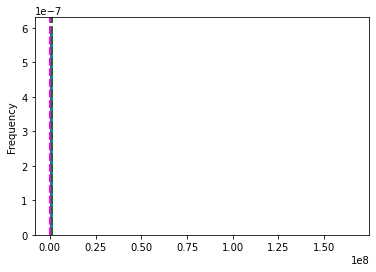

In [61]:
Data['usd_goal_real'].plot.hist(bins=100,density=True)
plt.axvline(Data['usd_goal_real'].describe()['mean'], color='red', linestyle='dashed', linewidth=2)
plt.axvline(Data['usd_goal_real'].describe()['50%'], color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(Data['usd_goal_real'].describe()['mean']+Data['usd_goal_real'].describe()['std']
            , color='green', linestyle='dashed', linewidth=2)

# MEDIAN

In [78]:
median = Data.median()

In [ ]:
print('Median :', median)

Median : ID                  1.448090e+09
goal                5.137000e+03
pledged             6.216800e+02
backers             1.200000e+01
usd pledged         3.929700e+02
usd_pledged_real    6.250000e+02
usd_goal_real       5.476450e+03
dtype: float64


In [63]:
modus = Data.mode()
print('Modus :',modus)

Modus :                 ID                      name  ... usd_pledged_real usd_goal_real
0            18520  New EP/Music Development  ...              0.0        5000.0
1           106144                       NaN  ...              NaN           NaN
2           113230                       NaN  ...              NaN           NaN
3           116600                       NaN  ...              NaN           NaN
4           126581                       NaN  ...              NaN           NaN
...            ...                       ...  ...              ...           ...
191083  1972372520                       NaN  ...              NaN           NaN
191084  1972373169                       NaN  ...              NaN           NaN
191085  1972375042                       NaN  ...              NaN           NaN
191086  1972380329                       NaN  ...              NaN           NaN
191087  1972381604                       NaN  ...              NaN           NaN

[191088 rows x 15 c

In [64]:
Data.goal.median()

5050.0

In [65]:
Data.usd_goal_real.median()

5461.0

In [ ]:
Data.goal.mode()

0    5000.0
dtype: float64

# MENCARI RANGE

In [79]:
import pandas as pd
Data = pd.DataFrame({'main_category':['Technology','Music', 'Design','Film & Video', 'Comics', 'Art', 'Fashion'],
                     'goal' : [5000,2500,4000,5000,10000,12000,15000],
                     'backers' : [20,100,549,632,855,180,750],
                     'pledged': [300,453,1283,8233,664,1781,15000]})
numcols = ['goal','backers', 'pledged']
for col in numcols:
  print(Data[col].name + 'range: '+str(Data[col].max() - Data[col].min()))

goalrange: 12500
backersrange: 835
pledgedrange: 14700


# MENCARI VARIANCE

In [88]:
import pandas as pd
Data = pd.DataFrame({'main_category':['Technology','Music', 'Design','Film & Video', 'Comics', 'Art', 'Fashion'],
                     'goal' : [5000,2500,4000,5000,10000,12000,15000],
                     'backers' : [20,100,549,632,855,180,750],
                     'pledged': [300,453,1283,8233,664,1781,15000]})
print(Data['goal'].var())

22059523.80952381


# MENCARI STANDARD DEVIATION

In [ ]:
import pandas as pd
Data = pd.DataFrame({'main_category':['Technology','Music', 'Design','Film & Video', 'Comics', 'Art', 'Fashion'],
                     'goal' : [5000,2500,4000,5000,10000,12000,15000],
                     'backers' : [20,100,549,632,855,180,750],
                     'pledged': [300,453,1283,8233,664,1781,15000]})
print(Data['backers'].std())

335.82357896740393


# MENCARI CONVIDENT INTERVAL

In [97]:
import numpy as np
import scipy.stats


def mean_confidence_interval(Data, confidence=0.95):
    a = 1.0 * np.array(Data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [9]:
print(mean_confidence_interval)

<function mean_confidence_interval at 0x7fd0cb8fb170>


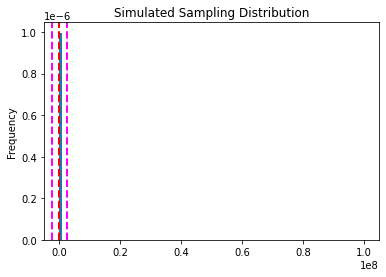

Sampling Mean: 49080.79152056854
Sampling StdErr: 1183391.2590927128
95% Confidence Interval: (-2270323.455920656, 2368485.0389617933)


In [107]:
#GOAL
goal1 = Data['goal']
ma = goal1.mean()
sd = goal1.std()
ci = stats.norm.interval(0.95, ma, sd)

# Plot the distribution, mean, and CI
goal1.plot.hist(title='Simulated Sampling Distribution', bins=100, density=True) 
plt.axvline(ma, color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci[0], color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=2)
plt.show()

# Print the Mean, StdDev and 95% CI
print ('Sampling Mean: ' + str(ma))
print ('Sampling StdErr: ' + str(sd))
print ('95% Confidence Interval: ' + str(ci))

# **HYPOTHESIS TESTING**

**CH12 HYPOTHESIS**

The chi2 test is used when you want to know if the effect is real or not. The CHI Square test is used to test two groups of data, both independent and dependent variables in the form of categorical or can also be said as a test of proportions for events or more, so that the data is discrete. For example, you want to know the relationship between maternal nutritional status (good or poor) and the incidence of LBW (yes or no).

In [108]:
#Sample 1
df_crosstab = pd.crosstab(Data['main_category'], Data['category'])
chisq, pvalue, Data, expected = stats.chi2_contingency(df_crosstab)
print(f'Observed chi2: {chisq:.2f}')
print(f'P-value: {pvalue:.4f}')
df_crosstab

Observed chi2: 5153170.51
P-value: 0.0000


category,3D Printing,Academic,Accessories,Action,Animals,Animation,Anthologies,Apparel,Apps,Architecture,Art,Art Books,Audio,Bacon,Blues,Calendars,Camera Equipment,Candles,Ceramics,Children's Books,Childrenswear,Chiptune,Civic Design,Classical Music,Comedy,Comic Books,Comics,Community Gardens,Conceptual Art,Cookbooks,Country & Folk,Couture,Crafts,Crochet,DIY,DIY Electronics,Dance,Design,Digital Art,Documentary,...,R&B,Radio & Podcasts,Ready-to-wear,Residencies,Restaurants,Robots,Rock,Romance,Science Fiction,Sculpture,Shorts,Small Batch,Software,Sound,Space Exploration,Spaces,Stationery,Tabletop Games,Taxidermy,Technology,Television,Textiles,Theater,Thrillers,Translations,Typography,Vegan,Video,Video Art,Video Games,Wearables,Weaving,Web,Webcomics,Webseries,Woodworking,Workshops,World Music,Young Adult,Zines
main_category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Art,0,0,0,0,0,0,0,0,0,0,8253,0,0,0,0,0,0,0,305,0,0,0,0,0,0,0,0,0,1030,0,0,0,0,0,0,0,0,0,1346,0,...,0,0,0,0,0,0,0,0,0,1810,0,0,0,0,0,0,0,0,0,0,0,276,0,0,0,0,0,0,194,0,0,0,0,0,0,0,0,0,0,0
Comics,0,0,0,0,0,0,405,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2743,4996,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,648,0,0,0,0,0,0
Crafts,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,429,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4664,162,1173,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,219,0,13,0,0,0,0,0,0,0,0,0,0,0,0,93,0,0,0,1167,0,0,0,0
Dance,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2322,0,0,0,...,0,0,0,69,0,0,0,0,0,0,0,0,0,0,0,200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,164,0,0,0
Design,0,0,0,0,0,0,0,0,0,760,0,0,0,0,0,0,0,0,0,0,0,0,289,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4199,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Fashion,0,0,3165,0,0,0,0,7166,0,0,0,0,0,0,0,0,0,0,0,0,483,0,0,0,0,0,0,0,0,0,0,275,0,0,0,0,0,0,0,0,...,0,0,864,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Film & Video,0,0,0,740,0,2541,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16139,...,0,0,0,0,0,0,0,190,744,0,12357,0,0,0,0,0,0,0,0,0,1015,0,0,746,0,0,0,0,0,0,0,0,0,0,5762,0,0,0,0,0
Food,0,0,0,0,0,0,0,0,0,0,0,0,0,221,0,0,0,0,0,0,0,0,0,0,0,0,0,298,0,540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2819,0,0,0,0,0,0,1808,0,0,0,428,0,0,0,0,0,0,0,0,0,0,588,0,0,0,0,0,0,0,0,0,0,0,0,0
Games,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14180,0,0,0,0,0,0,0,0,0,0,0,11830,0,0,0,0,0,0,0,0,0,0


# CONCLUSION

P Value yang didapat lebih kecil dari 0.5, maka dapat disimpulkan bahwa H0 = Diterima dan H1 = Ditolak